In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

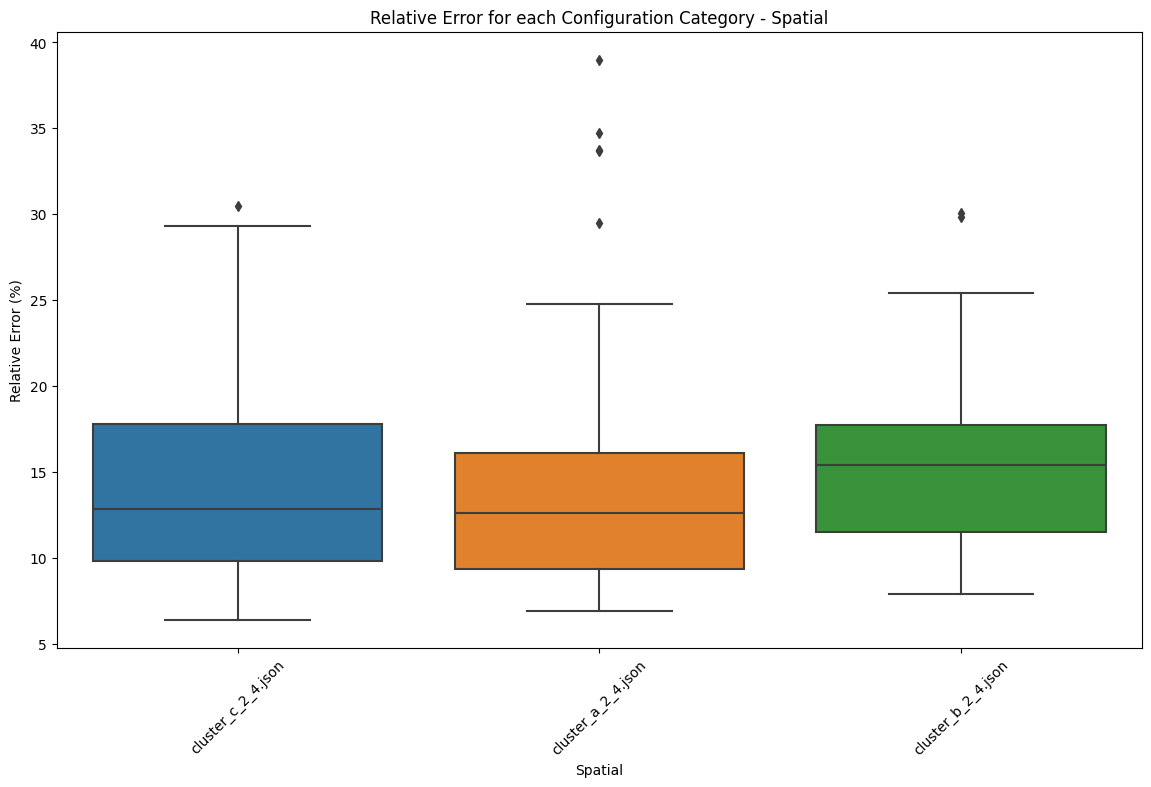

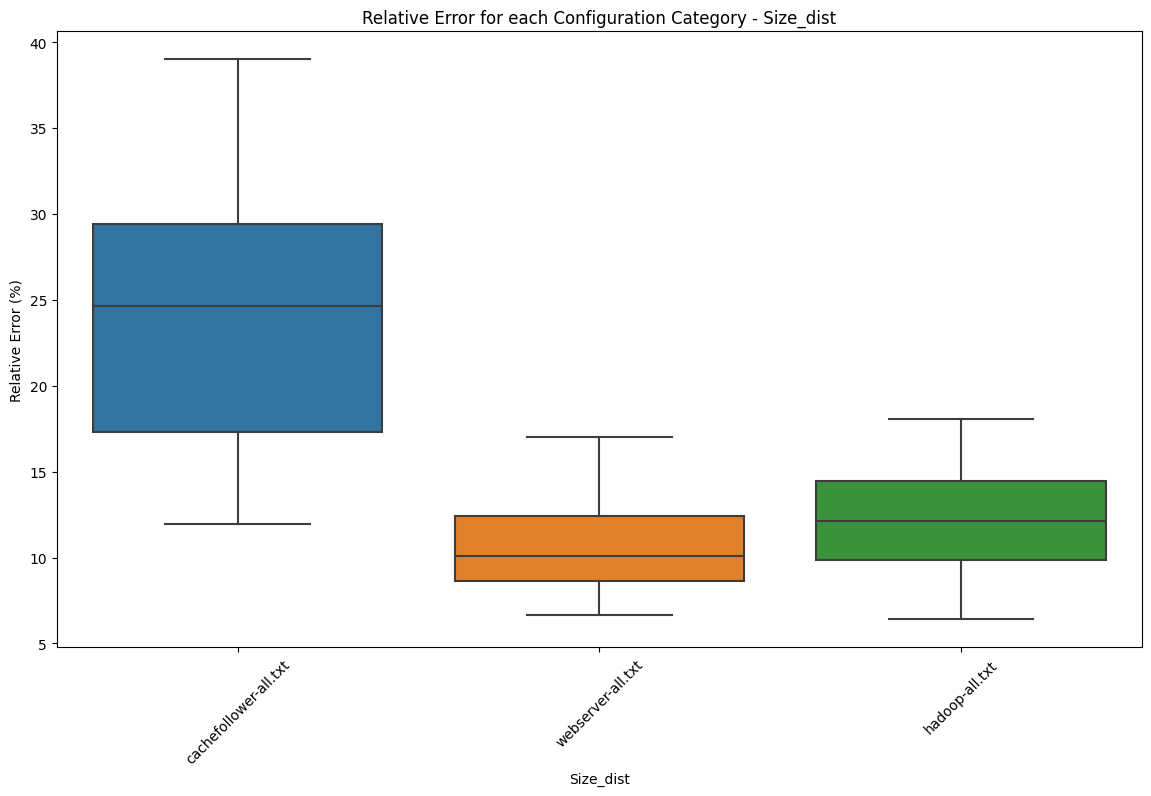

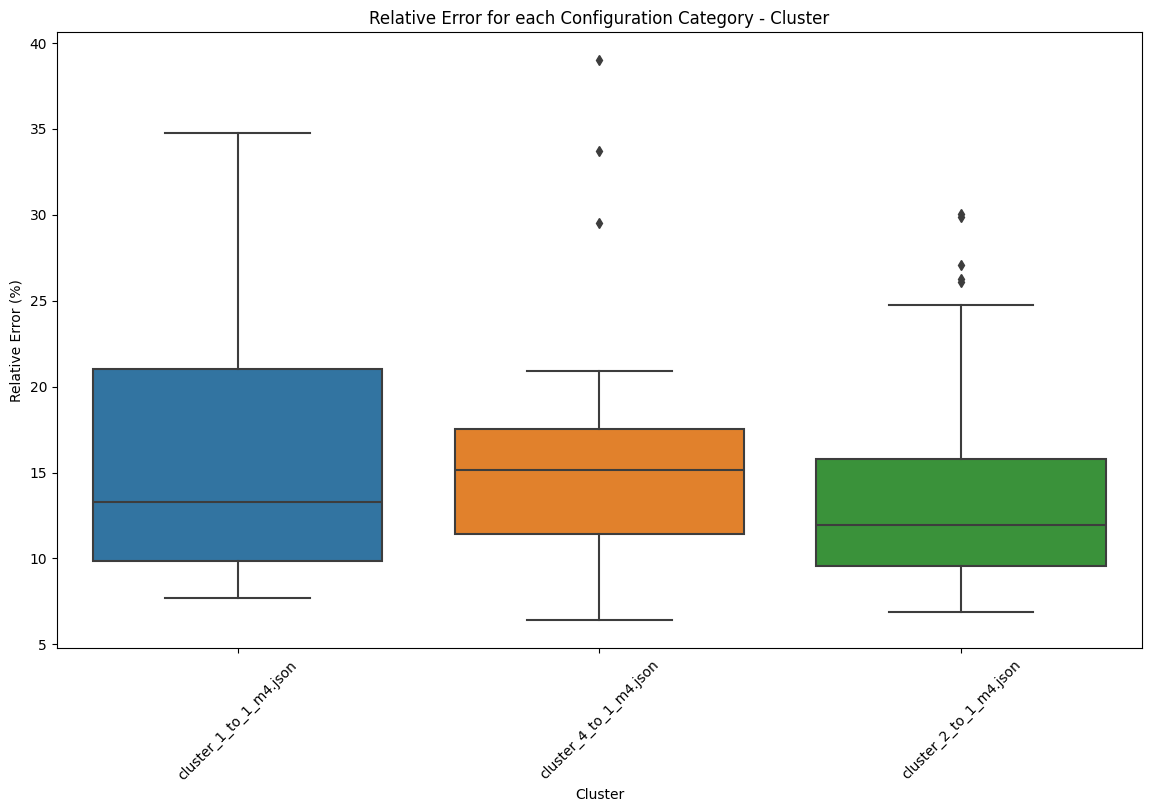

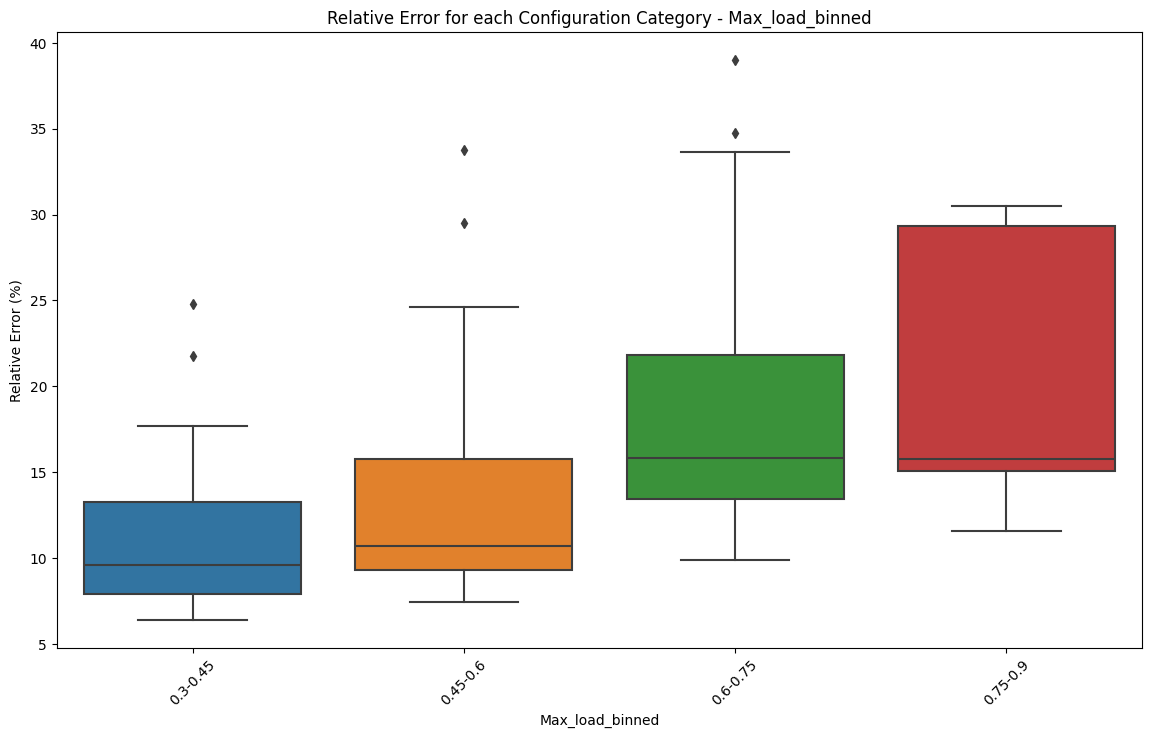

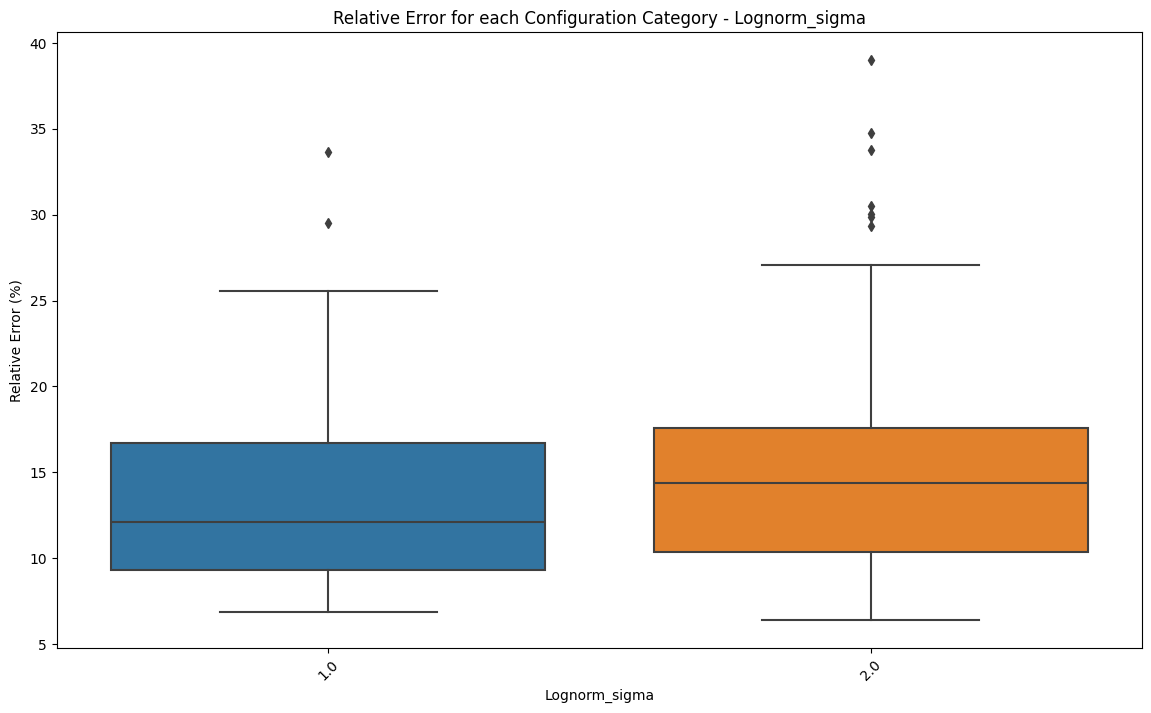

In [10]:
# Configuration
config_str = "_empirical"
# config_str="_eval_small"
config_file = f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/dctcp{config_str}.mix.json'
model_instance_list = ['flowsim']
output_path = './res/'

# Load configurations
with open(config_file, 'r') as f:
    configs = json.load(f)

# Collect valid indices where data exists
index_list_ori = [
    i for i in range(len(configs))
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data{config_str}/{i}/ns3/fid_topology_flows_dctcp.npy')
]

# Generate configuration list
config_list = [
    [
        configs[i]['spatial'].split('/')[-1],
        configs[i]['size_dist'].split('/')[-1],
        configs[i]['cluster'].split('/')[-1],
        float(configs[i]["max_load"]),
        float(configs[i]["lognorm_sigma"])
    ]
    for i in index_list_ori 
    # if configs[i]['size_dist'].split('/')[-1]=="cachefollower-all.txt"
]

# index_list=[idx for idx,i in enumerate(index_list_ori) if configs[i]['size_dist'].split('/')[-1]=="cachefollower-all.txt"]

# Load model error data and calculate relative error
error_list = []
for model_instance in model_instance_list:
    data_m4 = np.load(f'{output_path}{model_instance}{config_str}.npz')
    sldn = data_m4['sldn']
    # predicted_sldns = sldn[index_list, :, 0]
    # actual_sldns = sldn[index_list, :, 1]
    predicted_sldns = sldn[:, :, 0]
    actual_sldns = sldn[:, :, 1]

    # Adjust predictions and actual values to minimum of 1 to avoid division by zero
    predicted_sldns[predicted_sldns < 1] = 1
    actual_sldns[actual_sldns < 1] = 1

    # Calculate relative error in SLDN
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns * 100, axis=1)
    error_list.append(relative_error_sldn)

# Create a DataFrame for plotting
config_df = pd.DataFrame(config_list, columns=['spatial', 'size_dist', 'cluster', 'max_load', 'lognorm_sigma'])
error_df = pd.DataFrame(np.array(error_list).T, columns=model_instance_list)
combined_df = pd.concat([config_df, error_df], axis=1)

# Bin the 'max_load' values
max_load_bins = [0.3, 0.45, 0.6, 0.75, 0.9]  # Adjust bin edges as necessary
max_load_labels = ['0.3-0.45', '0.45-0.6', '0.6-0.75', '0.75-0.9']
combined_df['max_load_binned'] = pd.cut(combined_df['max_load'], bins=max_load_bins, labels=max_load_labels, include_lowest=True)

# List of configuration categories to plot, replacing 'max_load' with 'max_load_binned'
config_categories = ['spatial', 'size_dist', 'cluster', 'max_load_binned', 'lognorm_sigma']

# Plotting boxplots for each configuration category
for category in config_categories:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=category, y="flowsim", data=combined_df)
    plt.title(f'Relative Error for each Configuration Category - {category.capitalize()}')
    plt.xlabel(category.capitalize())
    plt.ylabel('Relative Error (%)')
    plt.xticks(rotation=45)
    plt.show()


(1000, 2000)


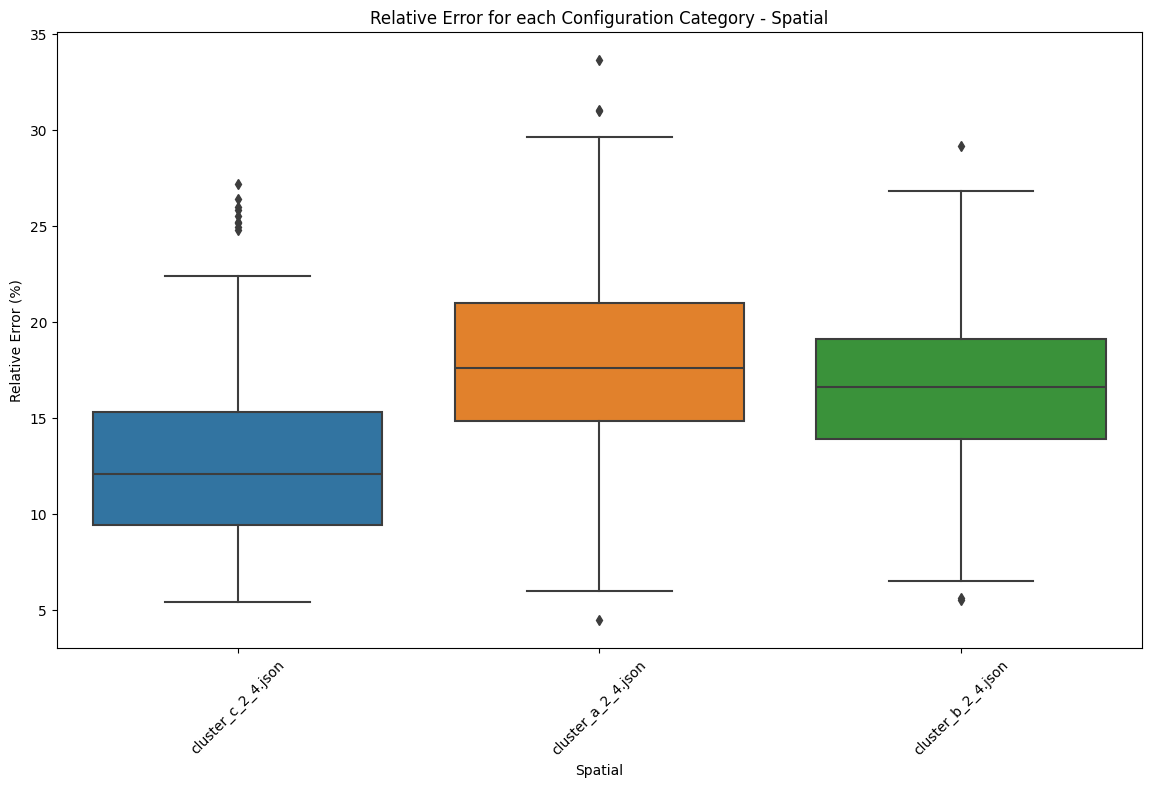

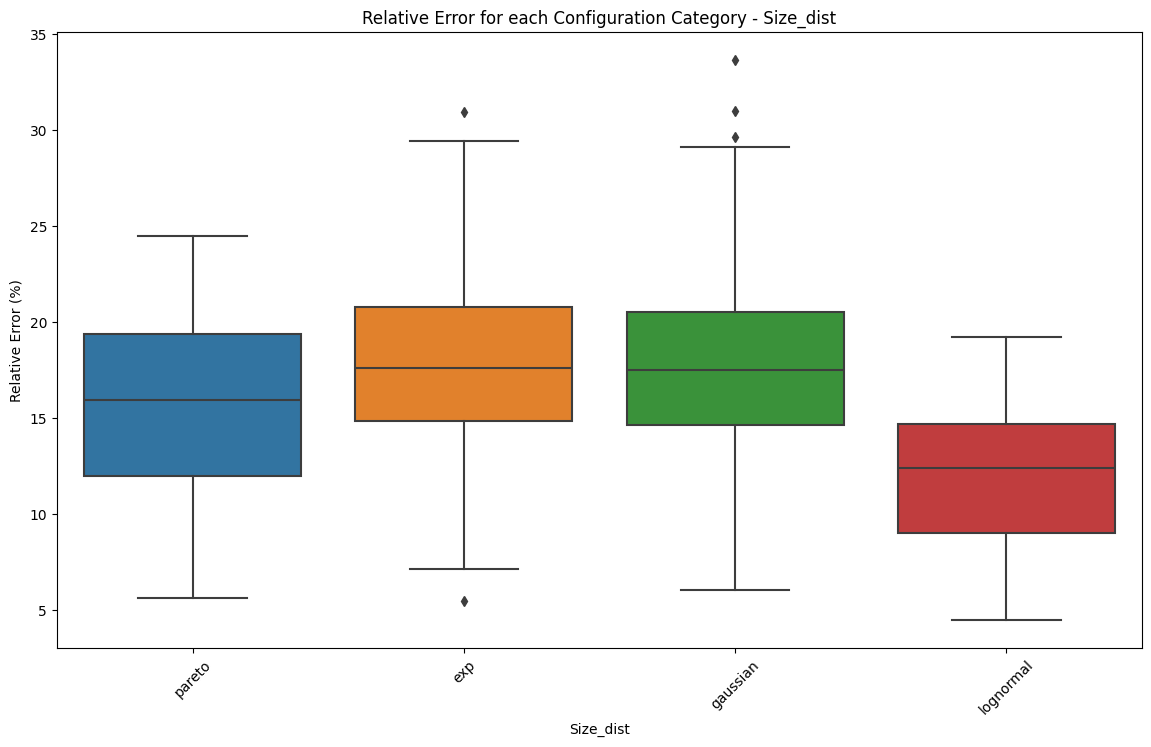

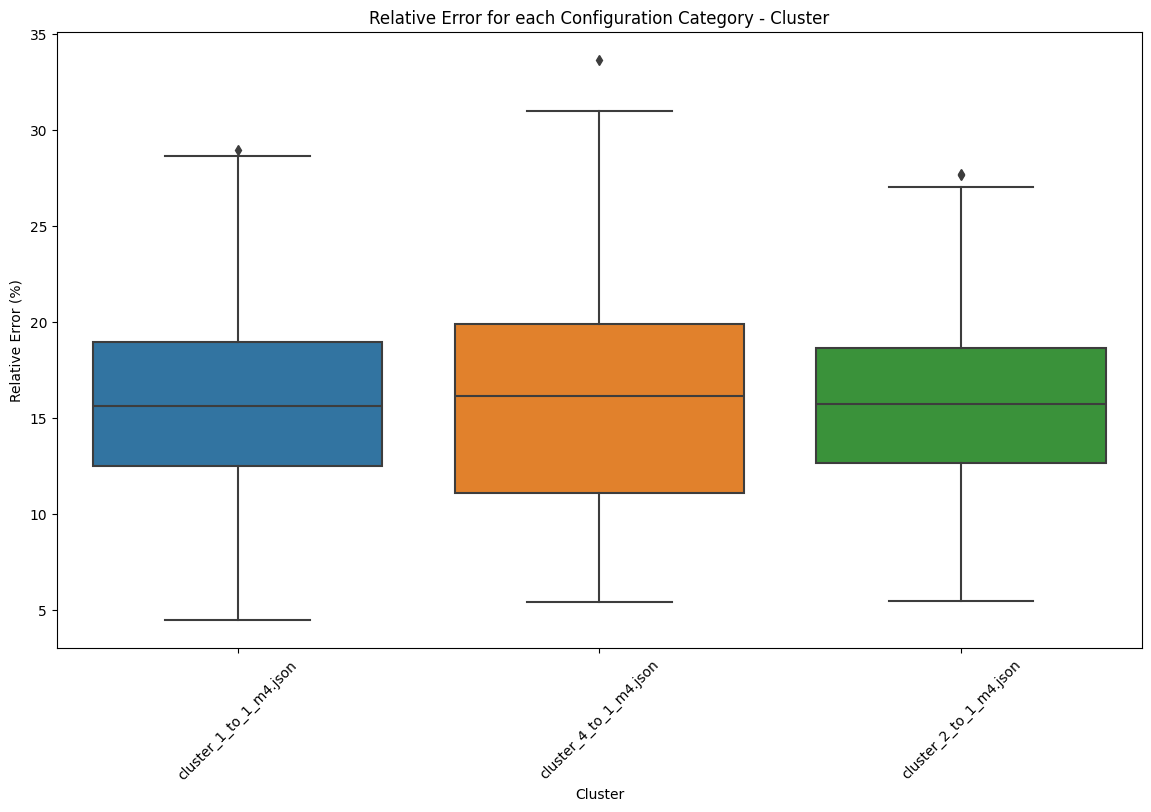

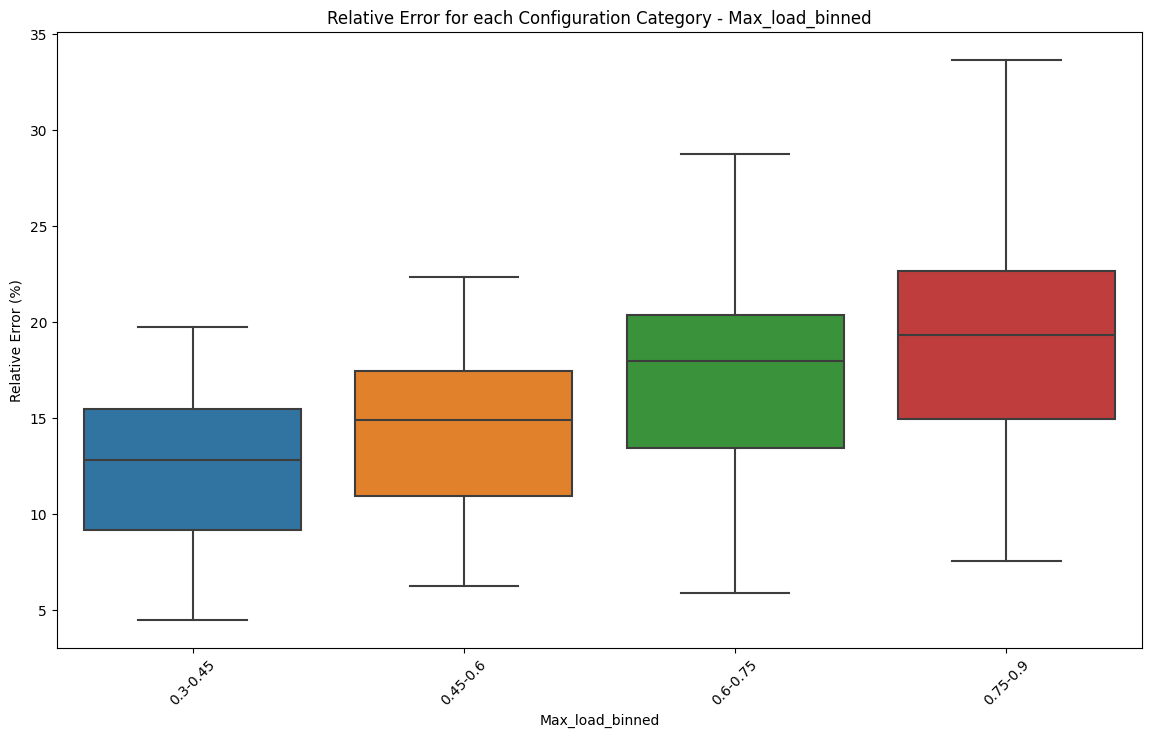

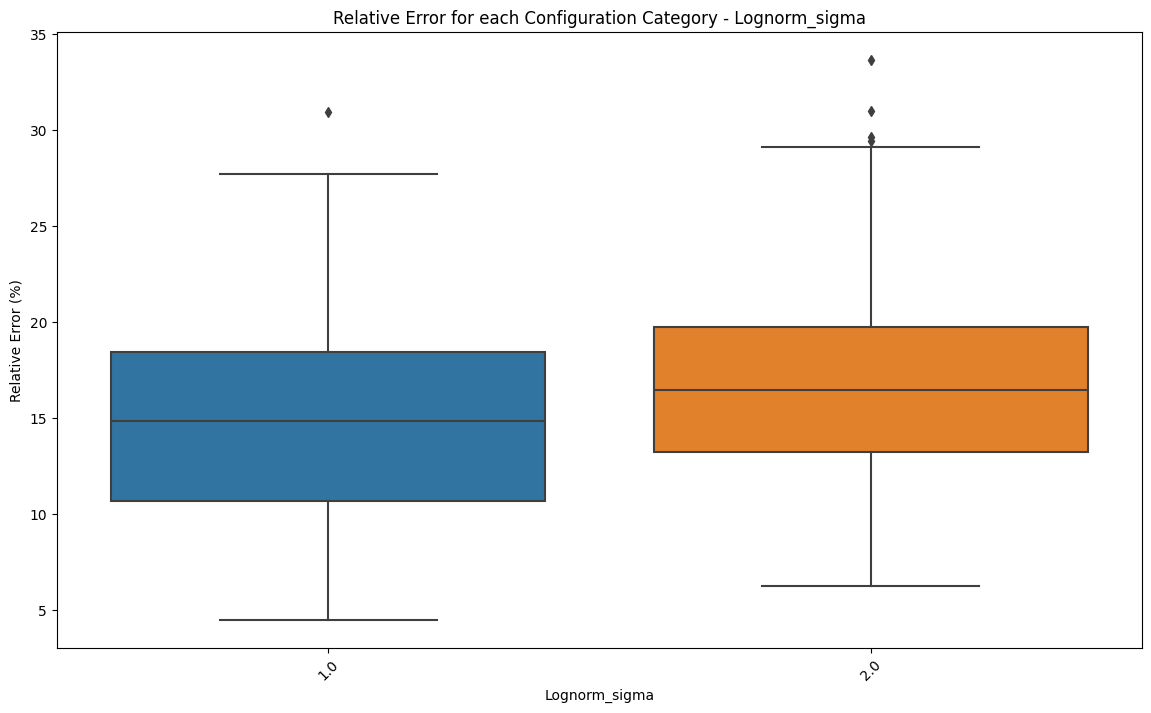

In [11]:
# Configuration
config_file = '/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/dctcp_sync.mix.json'
empirical_str = ""
model_instance_list = ['flowsim']
output_path = './res/'

# Load configurations
with open(config_file, 'r') as f:
    configs = json.load(f)

# Collect valid indices where data exists
index_list_ori = [
    i for i in range(len(configs))
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data/{i}/ns3/fid_topology_flows_dctcp.npy')
]
flow_size_sync_list=['exp','gaussian','lognormal','pareto']
# Generate configuration list
config_list = [
    [
        configs[i]['spatial'].split('/')[-1],
        flow_size_sync_list[int(configs[i]['size_dist'].split('/')[-1].split('.')[0].split('-')[-1])%len(flow_size_sync_list)],
        configs[i]['cluster'].split('/')[-1],
        float(configs[i]["max_load"]),
        float(configs[i]["lognorm_sigma"])
    ]
    for i in index_list_ori
]

# Load model error data and calculate relative error
error_list = []
n_flows=2000
for model_instance in model_instance_list:
    data_m4 = np.load(f'{output_path}{model_instance}{empirical_str}.npz')
    sldn = data_m4['sldn']
    predicted_sldns = sldn[:, :n_flows, 0]
    actual_sldns = sldn[:, :n_flows, 1]
    print(predicted_sldns.shape)
    # Adjust predictions and actual values to minimum of 1 to avoid division by zero
    predicted_sldns[predicted_sldns < 1] = 1
    actual_sldns[actual_sldns < 1] = 1

    # Calculate relative error in SLDN
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns * 100, axis=1)
    error_list.append(relative_error_sldn)

# Create a DataFrame for plotting
config_df = pd.DataFrame(config_list, columns=['spatial', 'size_dist', 'cluster', 'max_load', 'lognorm_sigma'])
error_df = pd.DataFrame(np.array(error_list).T, columns=model_instance_list)
combined_df = pd.concat([config_df, error_df], axis=1)

# Bin the 'max_load' values
max_load_bins = [0.3, 0.45, 0.6, 0.75, 0.9]  # Adjust bin edges as necessary
max_load_labels = ['0.3-0.45', '0.45-0.6', '0.6-0.75', '0.75-0.9']
combined_df['max_load_binned'] = pd.cut(combined_df['max_load'], bins=max_load_bins, labels=max_load_labels, include_lowest=True)

# List of configuration categories to plot, replacing 'max_load' with 'max_load_binned'
config_categories = ['spatial', 'size_dist', 'cluster', 'max_load_binned', 'lognorm_sigma']

# Plotting boxplots for each configuration category
for category in config_categories:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=category, y="flowsim", data=combined_df)
    plt.title(f'Relative Error for each Configuration Category - {category.capitalize()}')
    plt.xlabel(category.capitalize())
    plt.ylabel('Relative Error (%)')
    plt.xticks(rotation=45)
    plt.show()


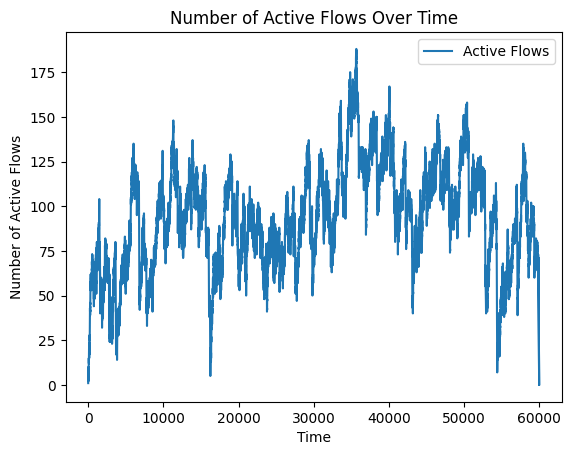

In [3]:
data_path="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data_eval/0/ns3"
fat=np.load(os.path.join(data_path, "fat.npy"))
fct=fat+np.load(os.path.join(data_path, "flowsim_fct.npy"))

arrival_events = np.column_stack((fat, np.ones_like(fat)))  # +1 for each arrival
completion_events = np.column_stack((fct, -np.ones_like(fct)))  # -1 for each completion

# Combine events and sort by time
all_events = np.vstack((arrival_events, completion_events))
all_events = all_events[all_events[:, 0].argsort()]  # Sort by time

# Calculate the number of active flows over time
times = all_events[:, 0]
flow_changes = all_events[:, 1]
active_flows = np.cumsum(flow_changes)

# Plot the number of active flows over time
# plt.plot(times, active_flows, label="Active Flows")
plt.plot(active_flows, label="Active Flows")
plt.xlabel("Time")
plt.ylabel("Number of Active Flows")
plt.title("Number of Active Flows Over Time")
plt.legend()
plt.show()